# **PHASE 3 PROJECT**

## *Overview*

This project aims to develop a binary classification model to predict customer churn for SyriaTel, a telecommunications company. By identifying customers likely to stop using the company's services soon, the business can implement targeted retention strategies to minimize revenue loss. The analysis will explore customer behavior, usage patterns, and demographics to uncover actionable insights. 

Leveraging machine learning techniques, the model will identify key features that contribute to churn, enabling SyriaTel to address root causes and enhance customer satisfaction. This proactive approach not only mitigates financial losses but also strengthens customer loyalty and competitive positioning.

### **1. Problem Definition**

- **Objective**: Develop a machine learning model to predict customer churn (binary classification: `Yes`/`No`), helping SyriaTel proactively address and mitigate churn risks.  
- **Outcome**: Enable SyriaTel to identify patterns in customer behavior and usage, equipping them with actionable insights to improve customer retention and reduce revenue loss.  
- **Metric for Success**: Select the most relevant evaluation metric, such as **Accuracy** (overall prediction correctness), **Precision** (proportion of true churn predictions), **Recall** (ability to detect all churn cases), **F1-Score** (balance between Precision and Recall), or **AUC-ROC** (model performance across thresholds), aligning with SyriaTel’s business priorities.

### **2. Data Collection**

- **Source**: The dataset for this project is sourced from Kaggle. It contains customer data, including demographics, account information, and usage patterns, relevant to predicting churn.  
- **File Format**: CSV (Comma-Separated Values).  
- **Link to Dataset**: *(https://www.kaggle.com/datasets/becksddf/churn-in-telecoms-dataset)*.  

### **Importing the Required Libraries**

In [3]:
#importing necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

### **3. Data Preparation**

### Creating DataFrame & Data Understanding  
These features will help identify patterns that distinguish customers who have churned from those who have remained loyal.  

In [4]:
df_churn = pd.read_csv("churn_telecom.csv")
df_churn.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [5]:
# Check shape of dataframe - 3333 rows and 21 columns
df_churn.shape

(3333, 21)

In [6]:
df_churn.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [7]:
df_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

## Data Preparation  
This section focuses on preparing the dataset for exploratory data analysis (EDA) and modeling. The steps include:  
- Identifying and removing duplicate rows.  
- Handling missing values to ensure data consistency.  
- Eliminating irrelevant columns that do not contribute meaningfully to the analysis.  

In [8]:
# Checking for duplicated rows, no duplicated rows to deal with.
df_churn.duplicated().sum()

0

In [9]:
# Checking for missing values, no missing values.

df_churn.isnull().sum() 

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

In [10]:
# Removing customer number feature as it is contact information on the client and adds no value to the analysis

df_churn.drop(['phone number', 'state', 'area code'],axis=1,inplace=True)
df_churn.head()

,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,128,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,107,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,137,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,84,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,75,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [11]:
df_churn.shape

(3333, 18)

In [12]:
categoricals = df_churn.select_dtypes("object")

for col in categoricals:
    print(df_churn[col].value_counts(), "\n")

international plan
no     3010
yes     323
Name: count, dtype: int64 

voice mail plan
no     2411
yes     922
Name: count, dtype: int64 



international plan
no     0.114950
yes    0.424149
Name: churn, dtype: float64


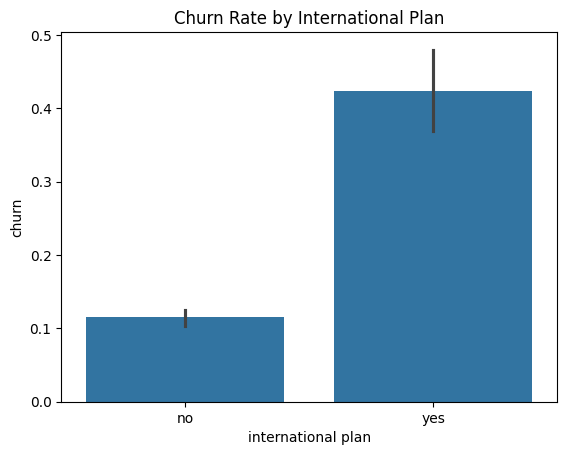

In [13]:
print(df_churn.groupby('international plan')['churn'].mean())
sns.barplot(x='international plan', y='churn', data=df_churn)
plt.title('Churn Rate by International Plan')
plt.show()

voice mail plan
no     0.167151
yes    0.086768
Name: churn, dtype: float64


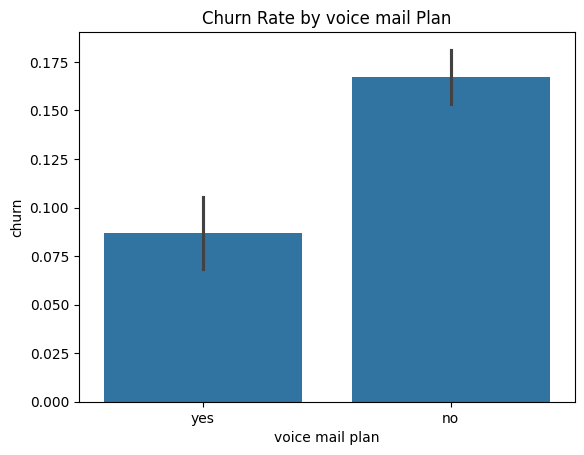

In [14]:
print(df_churn.groupby('voice mail plan')['churn'].mean())
sns.barplot(x='voice mail plan', y='churn', data=df_churn)
plt.title('Churn Rate by voice mail Plan')
plt.show()

In [15]:
df_churn.shape

(3333, 18)

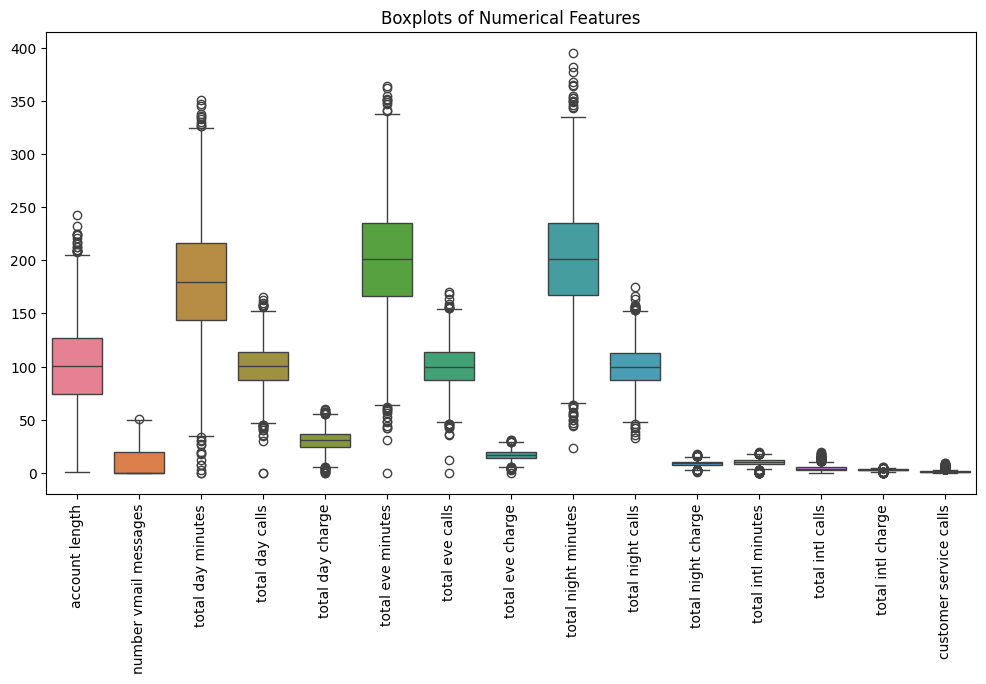

In [16]:
#Detecting outliers using boxplots
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_churn.select_dtypes(include='number'))
plt.title("Boxplots of Numerical Features")
plt.xticks (rotation= 90)
plt.show()

In [17]:
# from scipy import stats

# print("Before dropping numerical outliers, length of the dataframe is: ",len(df_churn))
# def drop_numerical_outliers(df_churn, z_thresh=3):
#     constrains = df_churn.select_dtypes(include=[np.number]).apply(lambda x: np.abs(stats.zscore(x)) < z_thresh) \
#         .all(axis=1)
#     df_churn.drop(df_churn.index[~constrains], inplace=True)
    
# drop_numerical_outliers(df_churn)
# print("After dropping numerical outliers, length of the dataframe is: ",len(df_churn))

In [18]:
def remove_outliers(df_churn, columns):
    for col in columns:
        # Calculate Q1 (25th percentile) and Q3 (75th percentile)
        Q1 = df_churn[col].quantile(0.25)
        Q3 = df_churn[col].quantile(0.75)
        IQR = Q3 - Q1  # Interquartile Range

        # Define lower and upper bounds for detecting outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Filter out outliers
        df_churn = df_churn[(df_churn[col] >= lower_bound) & (df_churn[col] <= upper_bound)]
    
    return df_churn

# List of columns to check for outliers (excluding 'Churn')
feature_columns = [col for col in df_churn.columns if col != 'Churn' and df_churn[col].dtype in [np.int64, np.float64]]

# Apply the function to remove outliers
df_churn = remove_outliers(df_churn, feature_columns)
df_churn

,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,128,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,107,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,137,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
4,75,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
5,118,yes,no,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,192,no,yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,68,no,no,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,28,no,no,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,184,yes,no,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


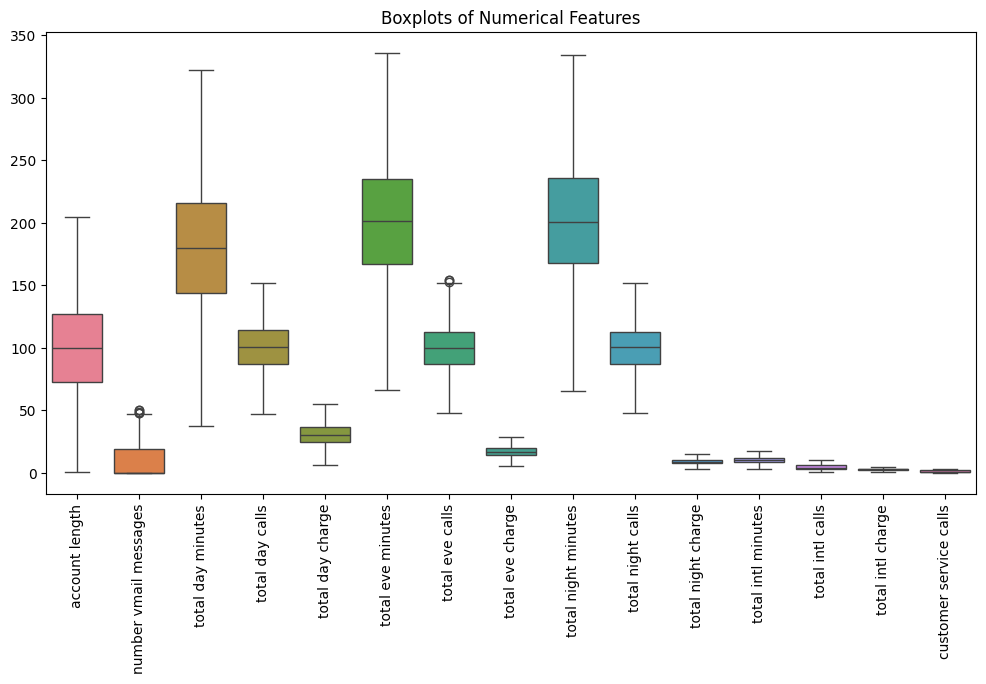

In [19]:
#Detecting outliers using boxplots
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_churn.select_dtypes(include='number'))
plt.title("Boxplots of Numerical Features")
plt.xticks (rotation= 90)
plt.show()

In [20]:
# Map 'yes' to 1 and 'no' to 0 in the 'international plan' and 'voice mail' columns
df_churn['international plan'] = df_churn['international plan'].map({'yes': 1, 'no': 0})
df_churn['voice mail plan'] = df_churn['voice mail plan'].map({'yes': 1, 'no': 0})

# Display the first few rows of the updated DataFrame
df_churn.head()

,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,128,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,107,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,137,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
4,75,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
5,118,1,0,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0,False


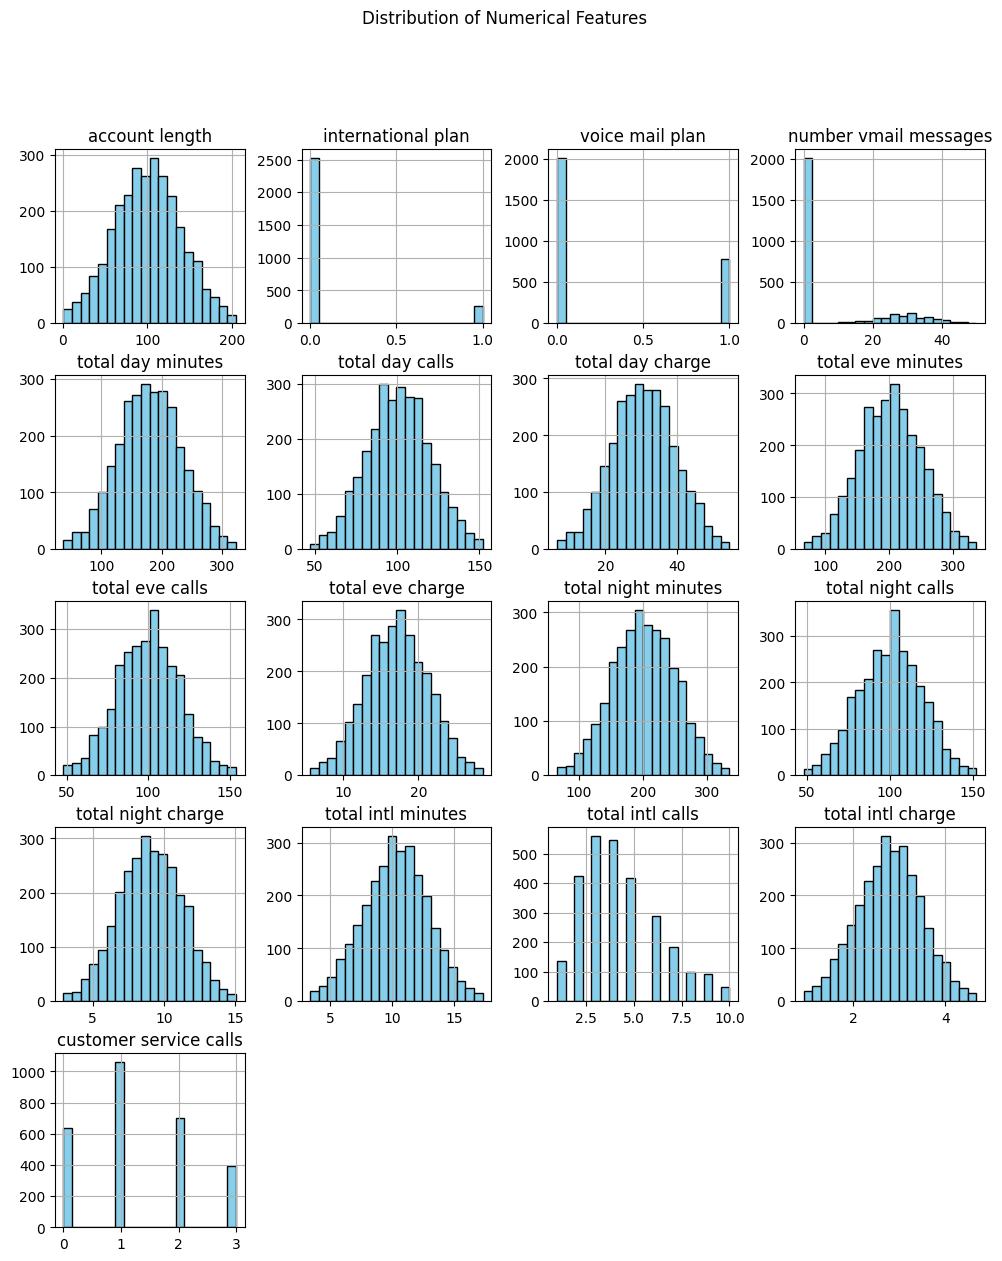

In [21]:
# Visualizing distributions using histograms
df_churn.hist(bins=20, figsize=(12, 14), color='skyblue', edgecolor='black')
plt.suptitle("Distribution of Numerical Features")
plt.show()


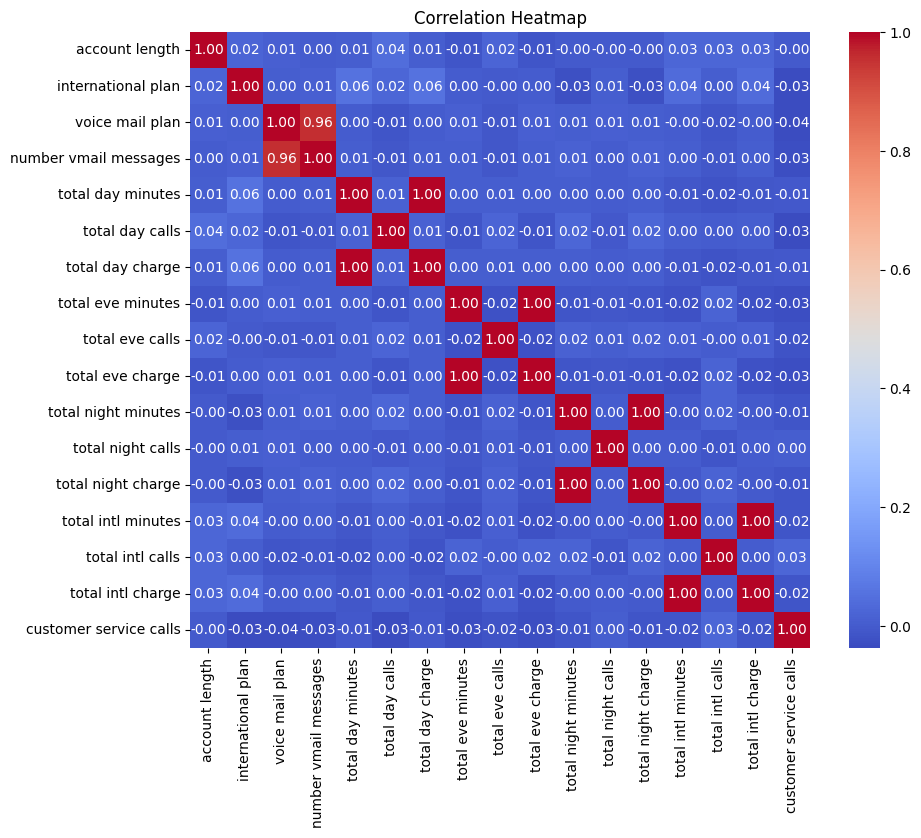

In [22]:
#Correlation heatmap (only numeric columns)
numeric_columns = df_churn.select_dtypes(include=['number']).columns

plt.figure(figsize=(10, 8))
sns.heatmap(df_churn[numeric_columns].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

In [23]:
import numpy as np
import pandas as pd

# Calculate the correlation matrix
corr_matrix = df_churn.corr().abs()

# Identify upper triangle of the correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find columns with correlation > 0.9
to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]

# Drop the columns
df_churn = df_churn.drop(columns=to_drop)

print("Dropped columns:", to_drop)


Dropped columns: ['number vmail messages', 'total day charge', 'total eve charge', 'total night charge', 'total intl charge']


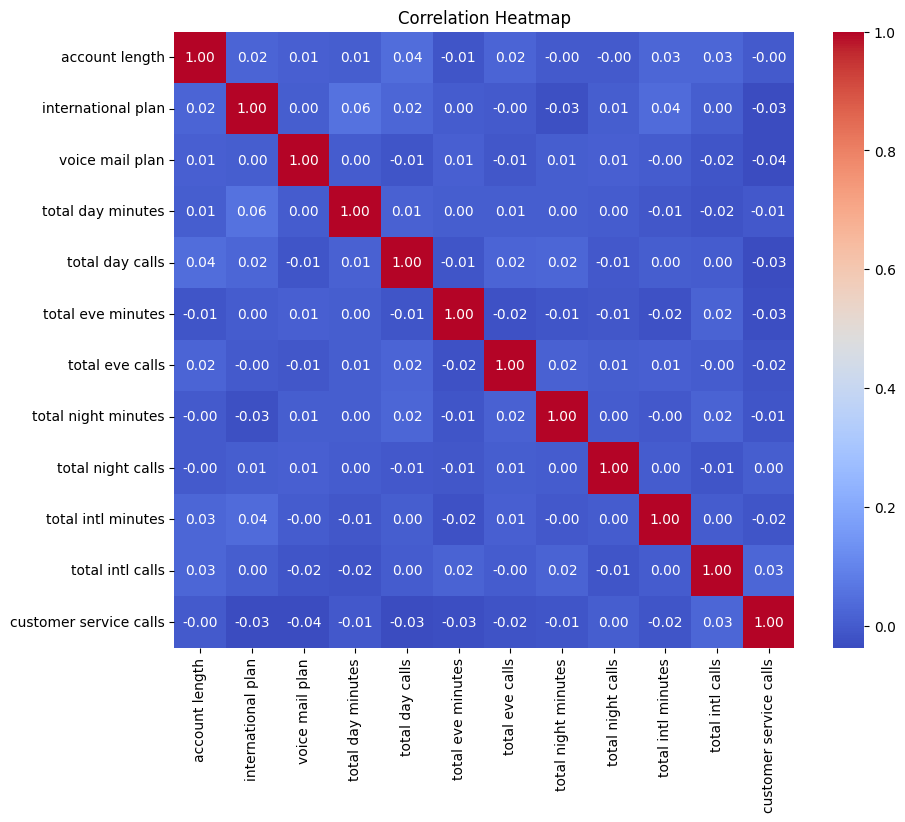

In [24]:
#Correlation heatmap (only numeric columns)
numeric_columns = df_churn.select_dtypes(include=['number']).columns

plt.figure(figsize=(10, 8))
sns.heatmap(df_churn[numeric_columns].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

In [25]:
# transforming churn values into 0s and 1s

df_churn['churn'].value_counts()
df_churn['churn'] = df_churn['churn'].map({True: 1, False: 0}).astype('int') 
df_churn.head(20)

,account length,international plan,voice mail plan,total day minutes,total day calls,total eve minutes,total eve calls,total night minutes,total night calls,total intl minutes,total intl calls,customer service calls,churn
0,128,0,1,265.1,110,197.4,99,244.7,91,10.0,3,1,0
1,107,0,1,161.6,123,195.5,103,254.4,103,13.7,3,1,0
2,137,0,0,243.4,114,121.2,110,162.6,104,12.2,5,0,0
4,75,1,0,166.7,113,148.3,122,186.9,121,10.1,3,3,0
5,118,1,0,223.4,98,220.6,101,203.9,118,6.3,6,0,0
7,147,1,0,157.0,79,103.1,94,211.8,96,7.1,6,0,0
9,141,1,1,258.6,84,222.0,111,326.4,97,11.2,5,0,0
11,74,0,0,187.7,127,163.4,148,196.0,94,9.1,5,0,0
12,168,0,0,128.8,96,104.9,71,141.1,128,11.2,2,1,0
13,95,0,0,156.6,88,247.6,75,192.3,115,12.3,5,3,0


In [26]:
# In order to standardise the range of features to ensure they all contribute equally to the model's performance we will perform scaling
from sklearn.preprocessing import MinMaxScaler # to scale the numeric features
transformer = MinMaxScaler()

def scaling(columns):
    return transformer.fit_transform(df_churn[columns].values.reshape(-1,1))

for i in df_churn.select_dtypes(include=[np.number]).columns:
    df_churn[i] = scaling(i)
df_churn.head()

,account length,international plan,voice mail plan,total day minutes,total day calls,total eve minutes,total eve calls,total night minutes,total night calls,total intl minutes,total intl calls,customer service calls,churn
0,0.622549,0.0,1.0,0.798455,0.600000,0.486667,0.481132,0.665428,0.413462,0.474820,0.222222,0.333333,0.0
1,0.519608,0.0,1.0,0.435042,0.723810,0.479630,0.518868,0.701487,0.528846,0.741007,0.222222,0.333333,0.0
2,0.666667,0.0,0.0,0.722261,0.638095,0.204444,0.584906,0.360223,0.538462,0.633094,0.444444,0.000000,0.0
4,0.362745,1.0,0.0,0.452949,0.628571,0.304815,0.698113,0.450558,0.701923,0.482014,0.222222,1.000000,0.0
5,0.573529,1.0,0.0,0.652037,0.485714,0.572593,0.500000,0.513755,0.673077,0.208633,0.555556,0.000000,0.0


In [27]:
df_churn.shape

(2797, 13)

#### 1. **Defining `X` and `y`**
   - **`y = df_churn['churn']`**:  
     - The target variable (`churn`) is separated into `y`.  
     - This variable contains the labels indicating whether a customer has churned (`Yes`) or not (`No`).
   - **`X = df_churn.drop(['churn'], axis=1)`**:  
     - All other columns except the target variable (`churn`) are assigned to `X`.  
     - These columns represent the features used to make predictions.

---

#### 2. **Splitting Data into Training and Test Sets**
   - **`train_test_split(X, y, random_state=17)`**:  
     - The dataset is split into:
       - **Training Set** (`X_train` and `y_train`): Used to train the model.
       - **Test Set** (`X_test` and `y_test`): Used to evaluate the model's performance on unseen data.  
     - `random_state=17`: Ensures reproducibility of the split by fixing the random seed.



The output provides insight into the distribution of the target variable (churn) across the training and test sets, highlighting the balance or imbalance between classes (e.g., churn vs. non-churn instances). This helps determine if additional methods, such as class balancing, are necessary.

In [28]:
# Define X and y
y =df_churn['churn']
X = df_churn.drop(['churn'],axis=1)

# Split the data into training and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=17)
print(y_train.value_counts(),'\n\n', y_test.value_counts())

churn
0.0    1874
1.0     223
Name: count, dtype: int64 

 churn
0.0    619
1.0     81
Name: count, dtype: int64


In [29]:
df_churn.churn.value_counts()

churn
0.0    2493
1.0     304
Name: count, dtype: int64

### Initializing and fiting Logistic Regression

Initializing a logistic regression model, setting `fit_intercept=False` to exclude an intercept term, and using a large `C` value to minimize regularization effects. It is specifying the `liblinear` solver, making it suitable for smaller datasets. Finally, the model is being trained on the training data (`X_train` and `y_train`), learning the relationships between features and the target variable (`churn`) to predict customer churn.

In [30]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(fit_intercept=False, C=1e16, solver='liblinear')
logreg.fit(X_train, y_train)

LogisticRegression(C=1e+16, fit_intercept=False, solver='liblinear')

In [31]:
# Importing the relevant function

from sklearn.metrics import mean_squared_error

# Generate predictions using baseline_model and X_train
y_pred = logreg.predict(X_test)

> Evaluating the logistic regression model's performance by printing the classification report and displaying a confusion matrix to visualize the model's predictions compared to the actual values.

**************** LOGISTIC REGRESSION CLASSIFIER MODEL RESULTS ****************
              precision    recall  f1-score   support

    No Churn       0.91      0.97      0.94       619
       Churn       0.51      0.22      0.31        81

    accuracy                           0.89       700
   macro avg       0.71      0.60      0.62       700
weighted avg       0.86      0.89      0.87       700



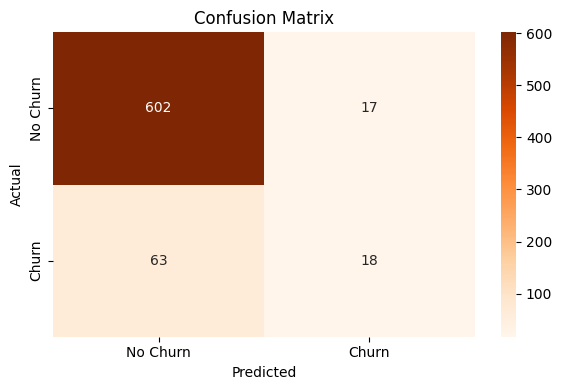

In [32]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Print classification metrics
print("**************** LOGISTIC REGRESSION CLASSIFIER MODEL RESULTS ****************")
print(classification_report(y_test, y_pred, target_names=['No Churn', 'Churn']))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Plot Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()

- **Precision**: The model is highly accurate in predicting "No Churn" (0.87), but much less accurate for "Churn" (0.55).
- **Recall**: The model does a great job identifying "No Churn" (0.97) but performs poorly on identifying "Churn" (0.19).
- **F1-Score**: The model has a strong F1-score for "No Churn" (0.92), but the F1-score for "Churn" is low (0.28), indicating poor balance between precision and recall for the "Churn" class.

In [33]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate and print key metrics
print("**************** LOGISTIC REGRESSION CLASSIFIER MODEL RESULTS ****************")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.5f}")
print(f"Precision: {precision_score(y_test, y_pred):.5f}")
print(f"Recall: {recall_score(y_test, y_pred):.5f}")
print(f"F1 Score: {f1_score(y_test, y_pred):.5f}")

**************** LOGISTIC REGRESSION CLASSIFIER MODEL RESULTS ****************
Accuracy: 0.88571
Precision: 0.51429
Recall: 0.22222
F1 Score: 0.31034


The model's performance metrics are as follows:

- **Accuracy (0.84994)**: The model correctly predicted 85% of the instances overall.
- **Precision (0.54762)**: When the model predicted "Churn," it was correct 55% of the time.
- **Recall (0.18699)**: The model identified only 19% of the actual "Churn" cases.
- **F1 Score (0.27879)**: The F1 score, which balances precision and recall, is low, indicating poor performance in detecting "Churn."

Overall, the model performs well in terms of accuracy but struggles significantly with detecting "Churn" due to a low recall and F1 score.

In [34]:
from sklearn.metrics import accuracy_score

# Predictions
y_train_pred = logreg.predict(X_train)
y_test_pred = logreg.predict(X_test)

# Calculate accuracy
train_accuracy = accuracy_score(y_train, y_train_pred) * 100
test_accuracy = accuracy_score(y_test, y_test_pred) * 100

# Output percentages
print(f"Training Accuracy: {train_accuracy:.2f}%")
print(f"Test Accuracy: {test_accuracy:.2f}%")


Training Accuracy: 89.32%
Test Accuracy: 88.57%


In [35]:
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)


# 2. Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# 3. Train the Random Forest model
model = RandomForestClassifier(random_state=42)
model.fit(X_resampled, y_resampled)

# 4. Make predictions
y_pred = model.predict(X_test)

# 5. Evaluate performance
print("**************** RANDOM FOREST CLASSIFIER RESULTS ****************")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.5f}")
print(f"Precision: {precision_score(y_test, y_pred):.5f}")
print(f"Recall: {recall_score(y_test, y_pred):.5f}")
print(f"F1 Score: {f1_score(y_test, y_pred):.5f}")


**************** RANDOM FOREST CLASSIFIER RESULTS ****************
Accuracy: 0.93000
Precision: 0.68182
Recall: 0.74074
F1 Score: 0.71006


In [36]:
# 6. Calculate and display class distribution percentages
def class_distribution(y_true, y_pred, label):
    unique, counts = np.unique(y_pred, return_counts=True)
    percentages = counts / len(y_pred) * 100
    print(f"\nClass Distribution in {label}:")
    for cls, pct in zip(unique, percentages):
        print(f"Churn {cls}: {pct:.2f}%")

# Output percentage distributions
class_distribution(y_train, y_train_pred, "Training Predictions")
class_distribution(y_test, y_test_pred, "Test Predictions")


Class Distribution in Training Predictions:
Churn 0.0: 96.14%
Churn 1.0: 3.86%

Class Distribution in Test Predictions:
Churn 0.0: 95.00%
Churn 1.0: 5.00%


In [ ]:
import warnings
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

# Suppress all FutureWarnings
warnings.filterwarnings("ignore", category=FutureWarning)

#4. Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],   # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],   # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4],     # Minimum number of samples required to be at a leaf node
    'bootstrap': [True, False]         # Whether bootstrap samples are used when building trees
}

# 5. Apply GridSearchCV to find the best parameters
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_resampled, y_resampled)

# 6. Print the best parameters found by GridSearchCV
print(f"Best Parameters: {grid_search.best_params_}")

# 7. Train the model with the best parameters
best_model = grid_search.best_estimator_

# 8. Make predictions
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)

# 9. Calculate and display performance metrics
train_accuracy = accuracy_score(y_train, y_train_pred) * 100
test_accuracy = accuracy_score(y_test, y_test_pred) * 100

print("**************** TUNED RANDOM FOREST RESULTS ****************")
print(f"Training Accuracy: {train_accuracy:.2f}%")
print(f"Test Accuracy: {test_accuracy:.2f}%")

# Output classification report
print("\nClassification Report for Test Set:")
print(classification_report(y_test, y_test_pred))

Fitting 3 folds for each of 216 candidates, totalling 648 fits


In [327]:
from sklearn.ensemble import RandomForestClassifier

# Define model with adjusted hyperparameters
rf_model = RandomForestClassifier(
    n_estimators=100,           # Reduce the number of trees
    max_depth=10,               # Limit tree depth
    min_samples_split=10,       # Require more samples for splitting
    min_samples_leaf=4,         # Require more samples for leaves
    bootstrap=True              # Enable bootstrapping (sampling with replacement)
)

# Fit the model and evaluate
rf_model.fit(X_train, y_train)


RandomForestClassifier(max_depth=10, min_samples_leaf=4, min_samples_split=10)

In [330]:
# Predict on both train and test data
y_train_pred = rf_model.predict(X_train)
y_test_pred = rf_model.predict(X_test)

# Calculate accuracy
train_accuracy = accuracy_score(y_train, y_train_pred) * 100
test_accuracy = accuracy_score(y_test, y_test_pred) * 100

# Output results
print(f"Training Accuracy: {train_accuracy:.2f}%")
print(f"Test Accuracy: {test_accuracy:.2f}%")

# Classification report for the test set
print("\nClassification Report for Test Set:")
print(classification_report(y_test, y_test_pred))

Training Accuracy: 96.71%
Test Accuracy: 94.14%

Classification Report for Test Set:
              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97       619
         1.0       0.95      0.52      0.67        81

    accuracy                           0.94       700
   macro avg       0.95      0.76      0.82       700
weighted avg       0.94      0.94      0.93       700



In [331]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

# Define the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)

# Hyperparameter grid for tuning
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

# Apply GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(estimator=dt_model, param_grid=param_grid, cv=3, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best parameters from GridSearchCV
print(f"Best Parameters: {grid_search.best_params_}")

# Train the model with the best parameters
best_dt_model = grid_search.best_estimator_

# Predict on both train and test data
y_train_pred = best_dt_model.predict(X_train)
y_test_pred = best_dt_model.predict(X_test)

# Calculate accuracy
train_accuracy = accuracy_score(y_train, y_train_pred) * 100
test_accuracy = accuracy_score(y_test, y_test_pred) * 100

# Output results
print(f"\nTraining Accuracy: {train_accuracy:.2f}%")
print(f"Test Accuracy: {test_accuracy:.2f}%")

# Classification report for the test set
print("\nClassification Report for Test Set:")
print(classification_report(y_test, y_test_pred))


Best Parameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 10}

Training Accuracy: 97.33%
Test Accuracy: 94.14%

Classification Report for Test Set:
              precision    recall  f1-score   support

         0.0       0.96      0.97      0.97       619
         1.0       0.76      0.72      0.74        81

    accuracy                           0.94       700
   macro avg       0.86      0.84      0.85       700
weighted avg       0.94      0.94      0.94       700



In [332]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

# Define the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Hyperparameter grid for RandomizedSearchCV
param_dist = {
    'n_estimators': np.arange(100, 1001, 100),  # Number of trees
    'max_depth': [None, 10, 20, 30, 40, 50],    # Maximum depth of trees
    'min_samples_split': [2, 5, 10],            # Minimum samples required to split a node
    'min_samples_leaf': [1, 2, 4],              # Minimum samples required to be at a leaf node
    'bootstrap': [True, False],                 # Whether to use bootstrap sampling
    'criterion': ['gini', 'entropy']           # The function to measure the quality of a split
}

# Apply RandomizedSearchCV to find the best hyperparameters
random_search = RandomizedSearchCV(estimator=rf_model, param_distributions=param_dist, 
                                    n_iter=100, cv=3, random_state=42, n_jobs=-1)

# Fit the model to training data
random_search.fit(X_train, y_train)

# Best parameters from RandomizedSearchCV
print(f"Best Parameters: {random_search.best_params_}")

# Train the model with the best parameters
best_rf_model = random_search.best_estimator_

# Predict on both train and test data
y_train_pred = best_rf_model.predict(X_train)
y_test_pred = best_rf_model.predict(X_test)

# Calculate accuracy
train_accuracy = accuracy_score(y_train, y_train_pred) * 100
test_accuracy = accuracy_score(y_test, y_test_pred) * 100

# Output results
print(f"\nTraining Accuracy: {train_accuracy:.2f}%")
print(f"Test Accuracy: {test_accuracy:.2f}%")

# Classification report for the test set
print("\nClassification Report for Test Set:")
print(classification_report(y_test, y_test_pred))


Best Parameters: {'n_estimators': 500, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': 10, 'criterion': 'gini', 'bootstrap': False}

Training Accuracy: 98.09%
Test Accuracy: 95.29%

Classification Report for Test Set:
              precision    recall  f1-score   support

         0.0       0.95      1.00      0.97       619
         1.0       0.98      0.60      0.75        81

    accuracy                           0.95       700
   macro avg       0.97      0.80      0.86       700
weighted avg       0.95      0.95      0.95       700



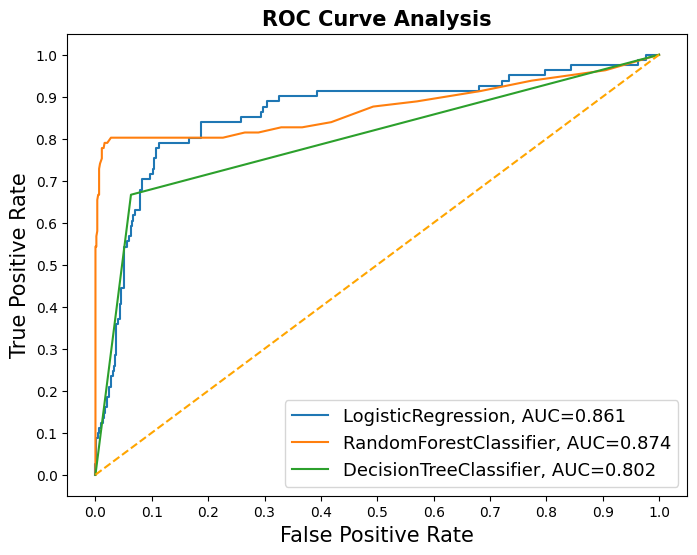

In [334]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

classifiers = [LogisticRegression(),
               RandomForestClassifier(),
               DecisionTreeClassifier()]

# Define a result table as a DataFrame
result_table = pd.DataFrame(columns=['classifiers', 'fpr', 'tpr', 'auc'])

# Train the models and record the results
for cls in classifiers:
    model = cls.fit(X_train, y_train)
    yproba = model.predict_proba(X_test)[:, 1]
    
    fpr, tpr, _ = roc_curve(y_test, yproba)
    auc = roc_auc_score(y_test, yproba)
    
    # Append results using pd.concat
    result_table = pd.concat([result_table, pd.DataFrame({'classifiers': [cls.__class__.__name__],
                                                          'fpr': [fpr], 
                                                          'tpr': [tpr], 
                                                          'auc': [auc]})], ignore_index=True)

# Set name of the classifiers as index labels
result_table.set_index('classifiers', inplace=True)

fig = plt.figure(figsize=(8, 6))

# Plot ROC curves
for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))
    
plt.plot([0, 1], [0, 1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("False Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size': 13}, loc='lower right')

plt.show()
